In [85]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math

In [86]:
def read_csv_to_array(filename):
    data = np.genfromtxt(filename, delimiter=',', dtype=float)
    return data

In [87]:
def compute_gradient(X, y, w, b):
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        err = f_wb - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [88]:
def compute_cost(X, y, w, b):
    # mean squared error
    cost = 0
    m = y.shape[0]
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i])**2
    cost /= 2 * m;
    return cost

In [89]:
def gradient_descent(X, y, w_in, b_in=0, alpha=0.01, num_iterations=10000):
    cost_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        # save cost at each iteration
        if i < 100000: # prevent resource exhaustion
            cost_history.append(compute_cost(X, y, w, b))
        # print cost at 10 intervals, or each iteration if < 10
        if i % math.ceil(num_iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost_history[-1]:.2e}",
                  f"w: {w}, b: {b:.3e}")
        if math.isnan(cost_history[-1]):
            raise ValueError(f"Cost is not a number at iteration {i}.")
    return w, b, cost_history

In [90]:
# data from https://www.marketwatch.com/
x_train = read_csv_to_array('x_train.csv')
y_train = read_csv_to_array('y_train.csv')

In [68]:
np.set_printoptions(precision=3, suppress=True)

In [82]:
num_features = x_train.shape[1]
w = np.zeros(num_features)
w, b, J_history = gradient_descent(x_train, y_train, w, 0, 0.0000000000000001)

Iteration    0: Cost 1.15e+04 w: [4.02688807e-12 1.13031176e-11 1.15697420e-11 1.10321757e-11
 1.13128796e-11 3.28734470e-06], b: 3.313e-14
Iteration 1000: Cost 1.03e+04 w: [5.68389985e-10 2.06537933e-09 2.07850760e-09 2.04489865e-09
 2.06022650e-09 2.82778035e-06], b: 4.617e-12
Iteration 2000: Cost 1.03e+04 w: [1.13323706e-09 4.12074835e-09 4.14677373e-09 4.08002287e-09
 4.11043500e-09 2.82778033e-06], b: 9.204e-12
Iteration 3000: Cost 1.03e+04 w: [1.69808414e-09 6.17611734e-09 6.21503984e-09 6.11514708e-09
 6.16064349e-09 2.82778030e-06], b: 1.379e-11
Iteration 4000: Cost 1.03e+04 w: [2.26293120e-09 8.23148632e-09 8.28330593e-09 8.15027127e-09
 8.21085196e-09 2.82778028e-06], b: 1.838e-11
Iteration 5000: Cost 1.03e+04 w: [2.82777827e-09 1.02868553e-08 1.03515720e-08 1.01853954e-08
 1.02610604e-08 2.82778026e-06], b: 2.297e-11
Iteration 6000: Cost 1.03e+04 w: [3.39262532e-09 1.23422242e-08 1.24198381e-08 1.22205196e-08
 1.23112688e-08 2.82778023e-06], b: 2.755e-11
Iteration 7000: Cost

In [137]:
def saveModel(w, b):
    filename = 'model.csv'
    with open(filename, 'wb') as f:
        np.savetxt(f, w, delimiter=',')
    with open(filename, 'ab') as f:
        np.savetxt(f, [b], delimiter=',')

In [138]:
saveModel(w, b)

ValueError: invalid mode: 'cb'

In [109]:
x_string = ''
wx_string = ''
for i in range(w.shape[0]):
    if i > 0:
        x_string += ', '
        wx_string += ' + '
    x_string += f'x_{i}'
    wx_string += f'{w[i]:.1e} x_{i}'
print(f'f_wb({x_string}) = {wx_string} + {b:.1e}')

f_wb(x_0, x_1, x_2, x_3, x_4, x_5) = 5.7e-09 x_0 + 2.1e-08 x_1 + 2.1e-08 x_2 + 2.0e-08 x_3 + 2.1e-08 x_4 + 2.8e-06 x_5 + 4.6e-11


In [108]:
fx = np.zeros(x_train.shape[0])
for i in range(x_train.shape[0]):
    fx[i] = np.dot(x_train[i], w) + b

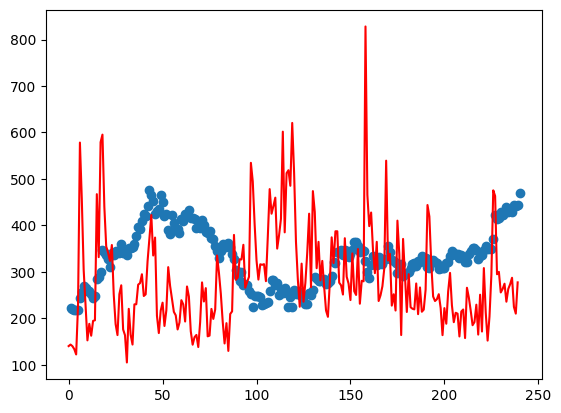

In [130]:
plt.scatter(x_train[:, 0], y_train)
plt.plot(fx, color='r')
plt.show()

In [131]:
x_predict = read_csv_to_array('x_predict.csv')
y_predict = read_csv_to_array('y_predict.csv')

In [132]:
predicted = np.zeros(x_predict.shape[0])
for i in range(x_predict.shape[0]):
    predicted[i] = np.dot(x_predict[i], w) + b

In [133]:
for i in range(x_predict.shape[0]):
    print(f"{int(x_predict[i, 0])}: |{predicted[i]:.2f} - {y_predict[i]}| = {abs(predicted[i] - y_predict[i]):.2f}")
cost_predict = compute_cost(x_predict, y_predict, w, b)
print(f"Cost of future predictions: {cost_predict:.2f}")

241: |387.43 - 443.29| = 55.86
242: |376.63 - 440.75| = 64.12
243: |241.28 - 447.82| = 206.54
244: |289.27 - 437.57| = 148.30
245: |201.32 - 431.81| = 230.49
246: |196.08 - 436.54| = 240.46
247: |317.02 - 423.53| = 106.51
248: |224.96 - 426.79| = 201.83
249: |205.49 - 434.9| = 229.41
250: |202.35 - 434.73| = 232.38
Cost of future predictions: 17077.09


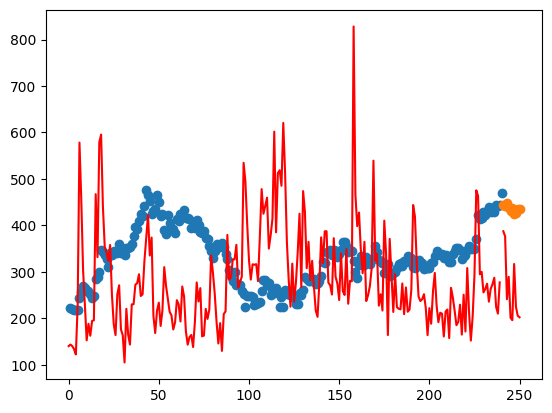

In [134]:
plt.scatter(x_train[:, 0], y_train)
plt.plot(fx, color='r')
plt.scatter(x_predict[:, 0], y_predict)
plt.plot(x_predict[:, 0], predicted, color='r')
plt.show()